Simulating Energy vs Temperature for 2D Ising Model:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.24s/it]


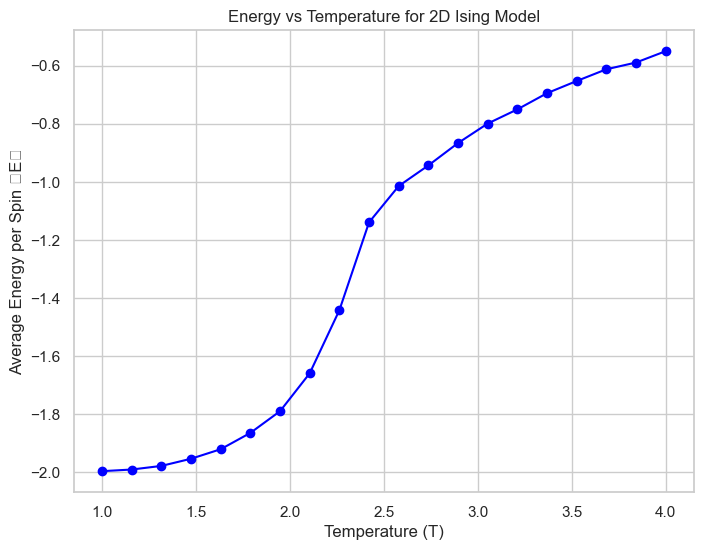

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  

class IsingModel2D:
    def __init__(self, L, T, J=1, H=1):
        """
        Initialize the 2D Ising model.

        Parameters:
        - L (int): Size of the lattice (L x L).
        - T (float): Temperature.
        - J (float): Interaction energy. Default is 1.
        - H (float): External magnetic field. Default is 0.
        """
        self.L = L
        self.T = T
        self.J = J
        self.H = H
        # Initialize spins randomly to +1 or -1
        self.spins = np.random.choice([-1, 1], size=(L, L))
        self.energy = self.calculate_total_energy()

    def calculate_total_energy(self):
        """
        Calculate the total energy of the current spin configuration.

        Returns:
        - total_energy (float): Total energy of the system.
        """
        energy = 0
        for i in range(self.L):
            for j in range(self.L):
                S = self.spins[i, j]
                # Periodic boundary conditions
                neighbors = self.spins[(i+1) % self.L, j] + \
                            self.spins[i, (j+1) % self.L] + \
                            self.spins[(i-1) % self.L, j] + \
                            self.spins[i, (j-1) % self.L]
                energy += -self.J * S * neighbors
        # Each pair counted twice
        energy /= 2
        # Add external field contribution
        energy -= self.H * np.sum(self.spins)
        return energy

    def delta_energy(self, i, j):
        """
        Calculate the change in energy if the spin at position (i, j) is flipped.

        Parameters:
        - i (int): Row index.
        - j (int): Column index.

        Returns:
        - delta_E (float): Change in energy.
        """
        S = self.spins[i, j]
        # Sum of nearest neighbors
        neighbors = self.spins[(i+1) % self.L, j] + \
                    self.spins[i, (j+1) % self.L] + \
                    self.spins[(i-1) % self.L, j] + \
                    self.spins[i, (j-1) % self.L]
        delta_E = 2 * S * (self.J * neighbors + self.H)
        return delta_E

    def metropolis_step(self):
        """
        Perform one Metropolis step over the entire lattice.
        """
        for _ in range(self.L**2):
            # Choose a random spin
            i = np.random.randint(0, self.L)
            j = np.random.randint(0, self.L)
            dE = self.delta_energy(i, j)
            if dE < 0:
                self.spins[i, j] *= -1
                self.energy += dE
            else:
                if np.random.rand() < np.exp(-dE / self.T):
                    self.spins[i, j] *= -1
                    self.energy += dE

    def simulate(self, steps, equilibration=True):
        """
        Simulate the Ising model for a given number of steps.

        Parameters:
        - steps (int): Number of Monte Carlo steps.
        - equilibration (bool): If True, discard initial steps for equilibration.

        Returns:
        - energies (list): List of energy measurements.
        """
        energies = []
        for step in range(steps):
            self.metropolis_step()
            if not equilibration or step >= steps // 2:
                energies.append(self.energy)
        return energies

    def visualize_spins(self):
        """
        Visualize the spin configuration.
        """
        plt.figure(figsize=(6,6))
        plt.imshow(self.spins, cmap='coolwarm', interpolation='nearest')
        plt.title('Spin Configuration')
        plt.colorbar(label='Spin')
        plt.show()

    def plot_energy(self, energies, T):
        """
        Plot the energy as a function of simulation steps.

        Parameters:
        - energies (list): List of energy measurements.
        - T (float): Temperature.
        """
        plt.figure()
        plt.plot(energies, label=f'T={T}')
        plt.xlabel('Monte Carlo Steps')
        plt.ylabel('Energy')
        plt.title('Energy vs Monte Carlo Steps')
        plt.legend()
        plt.show()

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 20)  # Temperature range from 1.0 to 4.0
    average_energies = []

    # Initialize progress bar
    print("Simulating Energy vs Temperature for 2D Ising Model:")
    for T in tqdm(temperatures):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation
        energies = model.simulate(steps, equilibration=True)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) / (L**2)
        average_energies.append(avg_energy)

    # Plot Energy vs Temperature
    plt.figure(figsize=(8,6))
    plt.plot(temperatures, average_energies, 'o-', color='blue')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Energy per Spin ⟨E⟩')
    plt.title('Energy vs Temperature for 2D Ising Model')
    plt.grid(True)
    plt.show()

    # Visualize spin configuration at a specific temperature
    # For example, at T=2.5
    # model = IsingModel2D(L, 2.5, J, H)
    # model.simulate(steps, equilibration=True)
    # model.visualize_spins()

if __name__ == "__main__":
    main()


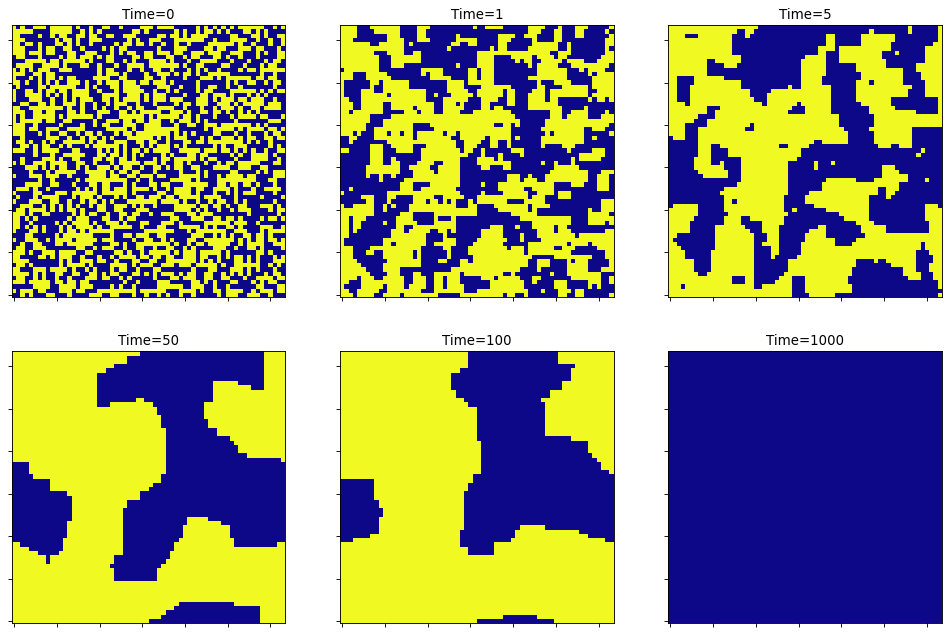

In [29]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    

    ## Monte Carlo moves
    def mcmove(self, config, N, beta):
        ''' 
        Execute the Monte Carlo moves using the Metropolis algorithm
        to satisfy the detailed balance condition.
        '''
        for i in range(N):
            for j in range(N):            
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s = config[a, b]
                nb = config[(a+1)%N, b] + config[a, (b+1)%N] + config[(a-1)%N, b] + config[a, (b-1)%N]
                cost = 2 * s * nb
                if cost < 0:	
                    s *= -1
                elif rand() < np.exp(-cost * beta):
                    s *= -1
                config[a, b] = s
        return config

    def simulate(self):   
        ''' Simulate the Ising model '''
        N, temp = 64, 0.4        # Initialize the lattice size and temperature
        config = 2 * np.random.randint(2, size=(N, N)) - 1
        f = plt.figure(figsize=(15, 15), dpi=80)    
        self.configPlot(f, config, 0, N, 1)
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0 / temp)
            if i == 1:       self.configPlot(f, config, i, N, 2, cmap = 'plasma')
            if i == 5:       self.configPlot(f, config, i, N, 3, cmap = 'plasma')
            if i == 50:      self.configPlot(f, config, i, N, 4, cmap = 'plasma')
            if i == 100:     self.configPlot(f, config, i, N, 5, cmap = 'plasma')
            if i == 1000:    self.configPlot(f, config, i, N, 6, cmap = 'plasma')

    def configPlot(self, f, config, i, N, n_, cmap = 'plasma'):
        ''' Plot the configuration at a given time step '''
        X, Y = np.meshgrid(range(N), range(N))
        sp = f.add_subplot(3, 3, n_)  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        sp.pcolormesh(X, Y, config, cmap=plt.cm.plasma)
        sp.set_title(f'Time={i}')
        sp.axis('tight')    

# Instantiate the Ising class and run the simulation
if __name__ == "__main__":
    model = Ising()
    model.simulate()
    plt.show()


Simulating Energy vs Temperature for 2D Ising Model:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.38s/it]


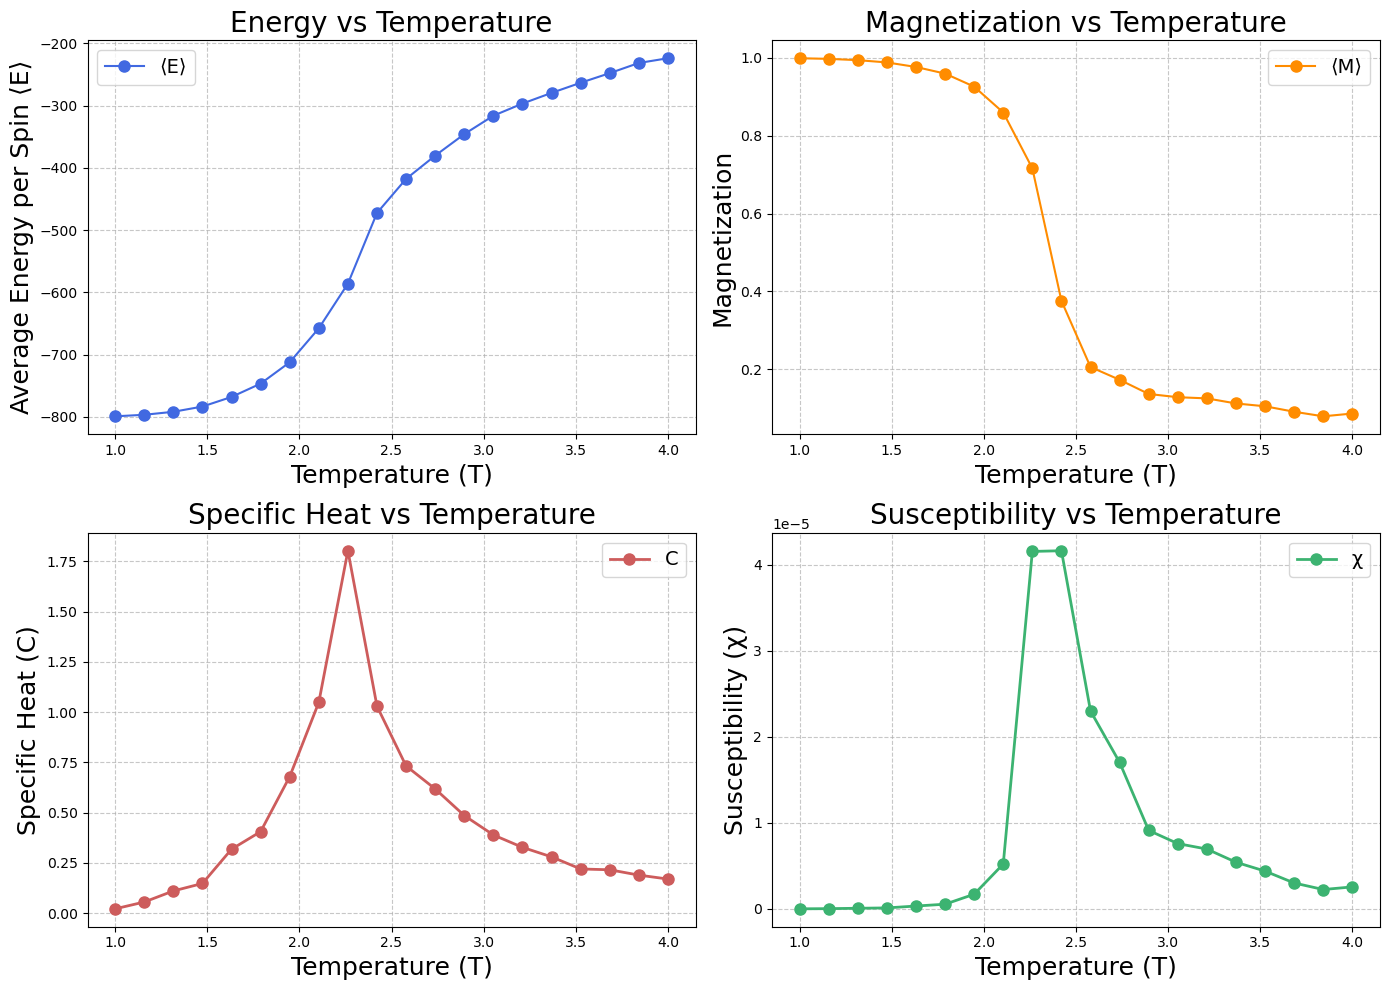

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For displaying progress bars

class IsingModel2D:
    def __init__(self, L, T, J=1, H=0):
        self.L = L
        self.T = T
        self.J = J
        self.H = H
        self.spins = np.random.choice([-1, 1], size=(L, L))
        self.energy = self.calculate_total_energy()

    def calculate_total_energy(self):
        energy = 0
        for i in range(self.L):
            for j in range(self.L):
                S = self.spins[i, j]
                neighbors = self.spins[(i+1) % self.L, j] + \
                            self.spins[i, (j+1) % self.L] + \
                            self.spins[(i-1) % self.L, j] + \
                            self.spins[i, (j-1) % self.L]
                energy += -self.J * S * neighbors
        energy /= 2
        energy -= self.H * np.sum(self.spins)
        return energy

    def delta_energy(self, i, j):
        S = self.spins[i, j]
        neighbors = self.spins[(i+1) % self.L, j] + \
                    self.spins[i, (j+1) % self.L] + \
                    self.spins[(i-1) % self.L, j] + \
                    self.spins[i, (j-1) % self.L]
        delta_E = 2 * S * (self.J * neighbors + self.H)
        return delta_E

    def metropolis_step(self):
        for _ in range(self.L**2):
            i = np.random.randint(0, self.L)
            j = np.random.randint(0, self.L)
            dE = self.delta_energy(i, j)
            if dE < 0 or np.random.rand() < np.exp(-dE / self.T):
                self.spins[i, j] *= -1
                self.energy += dE

    def simulate(self, steps, equilibration=True):
        energies = []
        magnetizations = []
        for step in range(steps):
            self.metropolis_step()
            if not equilibration or step >= steps // 2:
                energies.append(self.energy)
                magnetizations.append(np.abs(np.sum(self.spins)) / (self.L ** 2))
        return energies, magnetizations

def main():
    L = 20          
    J = 1           
    H = 0           
    steps = 2000  
    temperatures = np.linspace(1.0, 4.0, 20)  
    average_energies = []
    average_magnetizations = []
    
    # Initialize lists to store specific heats and susceptibilities
    specific_heats = []
    susceptibilities = []
    
    # Initialize progress bar
    print("Simulating Energy vs Temperature for 2D Ising Model:")
    for T in tqdm(temperatures):
        model = IsingModel2D(L, T, J, H)
        energies, magnetizations = model.simulate(steps, equilibration=True)
        avg_energy = np.mean(energies)
        avg_magnetization = np.mean(magnetizations)
        
        # Store averages
        average_energies.append(avg_energy)
        average_magnetizations.append(avg_magnetization)
        
        # Calculate specific heat and susceptibility
        energy_fluctuation = np.var(energies)
        specific_heat = energy_fluctuation / (L**2 * T**2)
        specific_heats.append(specific_heat)  # Store specific heat
        
        magnetization_fluctuation = np.var(magnetizations)
        susceptibility = magnetization_fluctuation / (L**2 * T)
        susceptibilities.append(susceptibility)  # Store susceptibility

    # Plot Energy vs Temperature
    plt.figure(figsize=(14, 10))

    # Energy vs Temperature
    plt.subplot(2, 2, 1)
    plt.plot(temperatures, average_energies, 'o-', color='royalblue', markersize=8, label='⟨E⟩')
    plt.xlabel('Temperature (T)', fontsize=18)
    plt.ylabel('Average Energy per Spin ⟨E⟩', fontsize=18)
    plt.title('Energy vs Temperature', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)

    # Magnetization vs Temperature
    plt.subplot(2, 2, 2)
    plt.plot(temperatures, average_magnetizations, 'o-', color='darkorange', markersize=8, label='⟨M⟩')
    plt.xlabel('Temperature (T)', fontsize=18)
    plt.ylabel('Magnetization', fontsize=18)
    plt.title('Magnetization vs Temperature', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)

    # Specific Heat vs Temperature (Line plot)
    plt.subplot(2, 2, 3)
    plt.plot(temperatures, specific_heats, color='indianred', linewidth=2, marker='o', markersize=8, label='C')
    plt.xlabel('Temperature (T)', fontsize=18)
    plt.ylabel('Specific Heat (C)', fontsize=18)
    plt.title('Specific Heat vs Temperature', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)

    # Susceptibility vs Temperature (Line plot)
    plt.subplot(2, 2, 4)
    plt.plot(temperatures, susceptibilities, color='mediumseagreen', linewidth=2, marker='o', markersize=8, label='χ')
    plt.xlabel('Temperature (T)', fontsize=18)
    plt.ylabel('Susceptibility (χ)', fontsize=18)
    plt.title('Susceptibility vs Temperature', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)

    plt.tight_layout()
    plt.savefig('ising_model_results.png', dpi=300)  # Save figure with high resolution
    plt.show()

if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

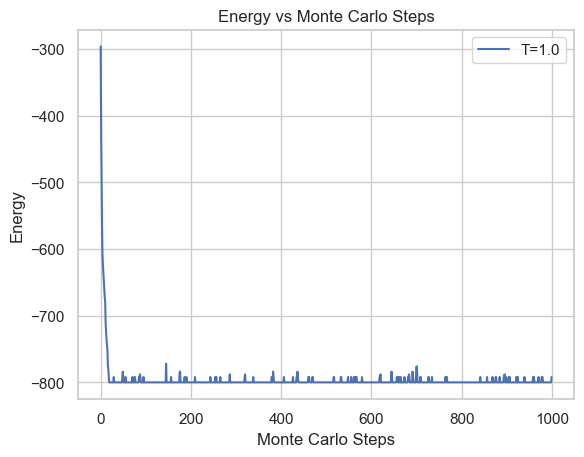

 20%|████████████████▊                                                                   | 1/5 [00:04<00:18,  4.65s/it]

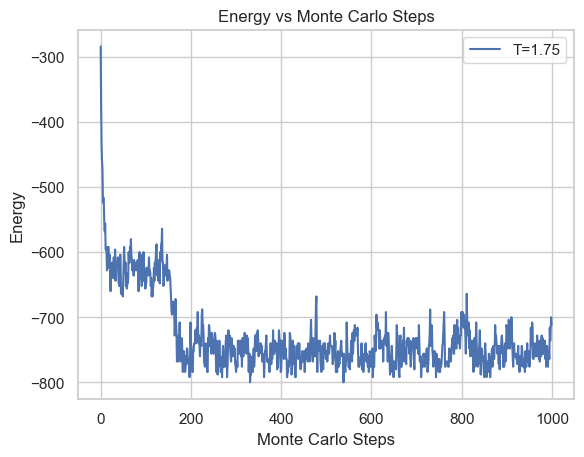

 40%|█████████████████████████████████▌                                                  | 2/5 [00:09<00:13,  4.64s/it]

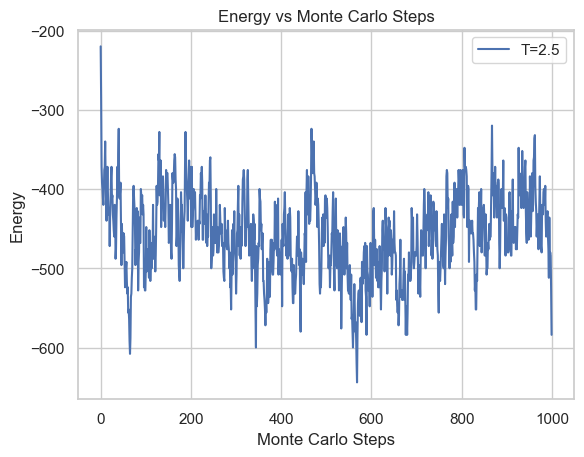

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:13<00:09,  4.63s/it]

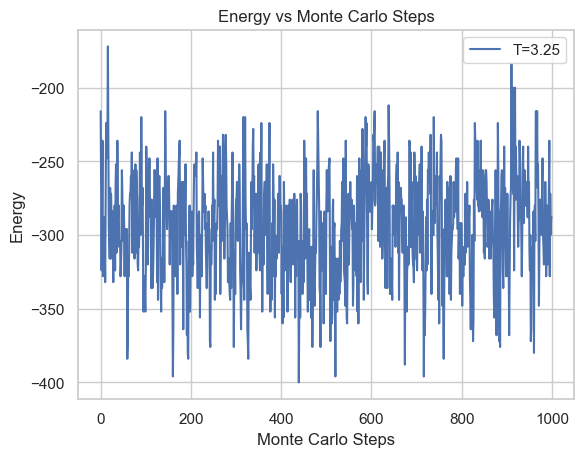

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:19<00:04,  4.88s/it]

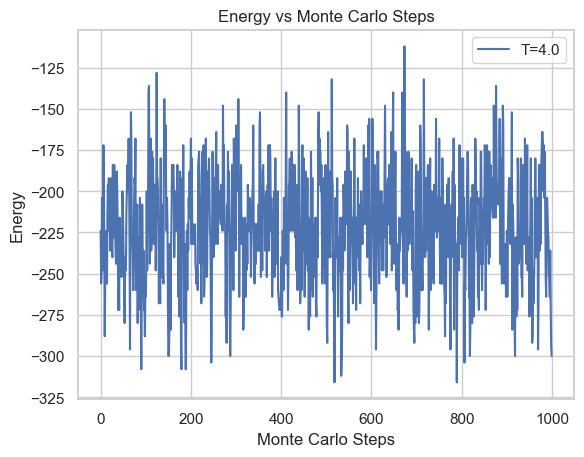

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.82s/it]
C:\Users\Katha\AppData\Local\Temp\ipykernel_7384\3174683752.py:31: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from current font.
  plt.tight_layout()
C:\Users\Katha\AppData\Local\Temp\ipykernel_7384\3174683752.py:31: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from current font.
  plt.tight_layout()


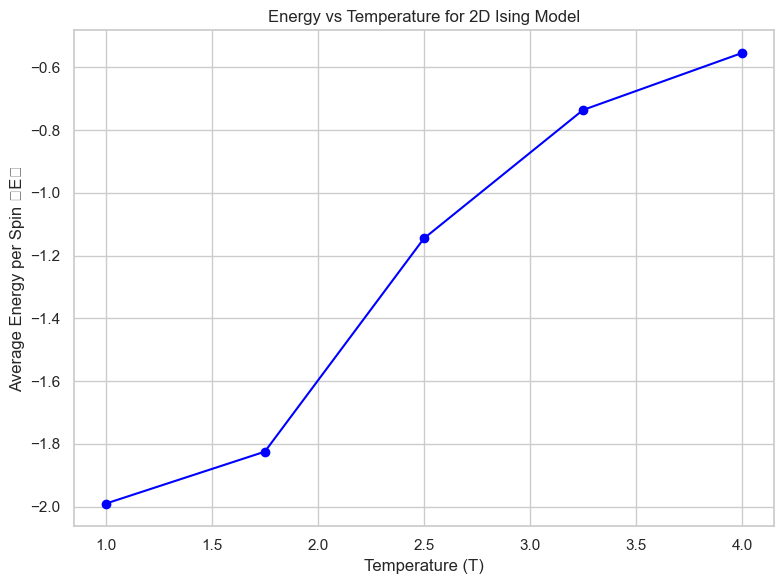

In [9]:
def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    for T in tqdm(temperatures):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = model.simulate(steps, equilibration=False)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) / (L**2)
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature
        model.plot_energy(energies, T)

    # Plot Energy vs Temperature
    plt.figure(figsize=(8,6))
    plt.plot(temperatures, average_energies, 'o-', color='blue')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Energy per Spin ⟨E⟩')
    plt.title('Energy vs Temperature for 2D Ising Model')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


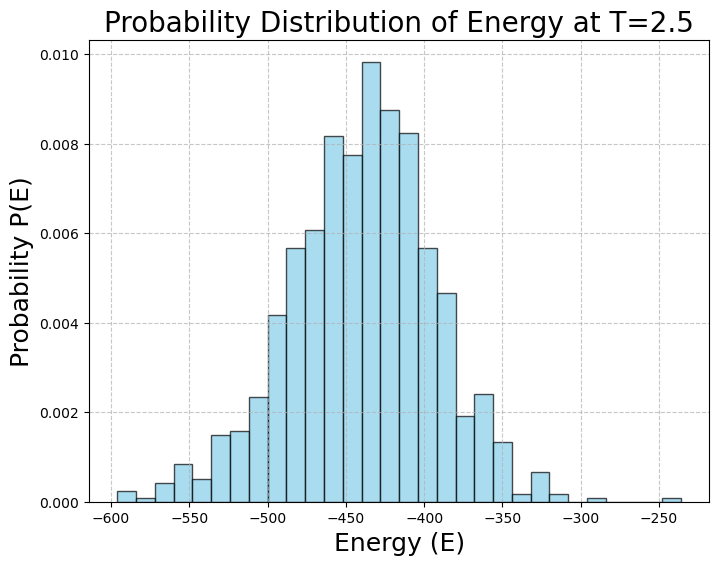

In [3]:
def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    T = 2.5         # Chosen temperature for energy distribution

    # Initialize the model
    model = IsingModel2D(L, T, J, H)
    
    # Simulate and collect energies
    energies = model.simulate(steps, equilibration=False)

    # Plot Probability of E vs E
    plt.figure(figsize=(8,6))
    
    # Create a histogram for the energies, normalize it to get probabilities
    plt.hist(energies, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)

    plt.xlabel('Energy (E)', fontsize=18)
    plt.ylabel('Probability P(E)', fontsize=18)
    plt.title(f'Probability Distribution of Energy at T={T}', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    main()


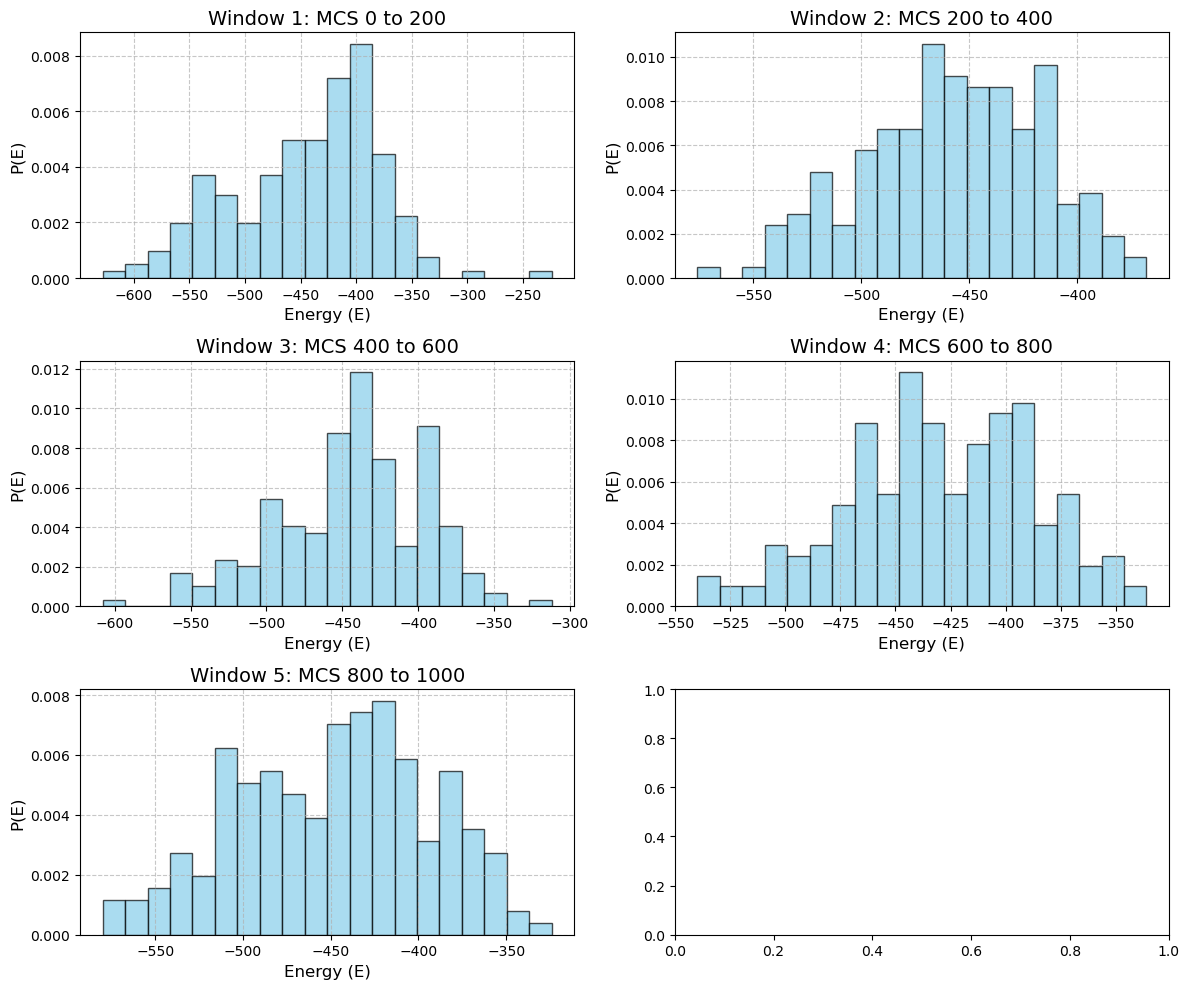

In [5]:
def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Total number of Monte Carlo steps
    window_size = 200  # Size of each MCS window
    T = 2.5         # Chosen temperature for energy distribution

    # Initialize the model
    model = IsingModel2D(L, T, J, H)
    
    # Simulate and collect energies
    energies = model.simulate(steps, equilibration=False)

    # Calculate the number of windows
    num_windows = steps // window_size
    
    # Create subplots: Adjust the number of rows and columns to fit num_windows
    fig, axes = plt.subplots(nrows=(num_windows + 1) // 2, ncols=2, figsize=(12, 10))  # Adjust grid size based on num_windows
    axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

    # Plot histograms for different MCS windows
    for i in range(num_windows):
        # Select the window of energy values
        window_energies = energies[i * window_size : (i + 1) * window_size]
        
        # Plot the histogram of energies in this window on the correct subplot
        axes[i].hist(window_energies, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
        
        # Label the plot
        axes[i].set_xlabel('Energy (E)', fontsize=12)
        axes[i].set_ylabel('P(E)', fontsize=12)
        axes[i].set_title(f'Window {i+1}: MCS {i*window_size} to {(i+1)*window_size}', fontsize=14)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout to prevent overlapping labels
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


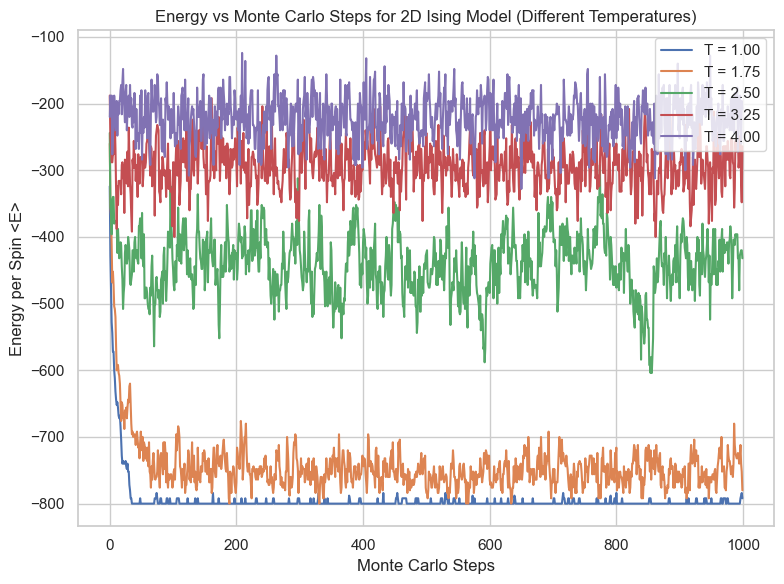

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    
    # Create a plot for Energy vs Monte Carlo steps for all temperatures
    plt.figure(figsize=(8,6))
    
    for T in tqdm(temperatures):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = model.simulate(steps, equilibration=False)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) 
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature on the same plot
        plt.plot(range(steps), energies, label=f'T = {T:.2f}')  # Normalize by lattice size

    # Finalize the plot for Energy vs Monte Carlo steps
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Energy per Spin <E>')
    plt.title('Energy vs Monte Carlo Steps for 2D Ising Model (Different Temperatures)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.21s/it]


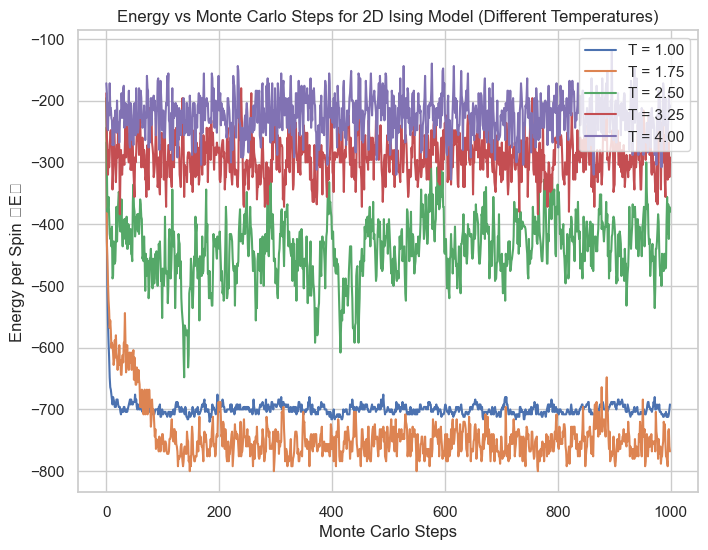

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    
    # Create a plot for Energy vs Monte Carlo steps for all temperatures
    plt.figure(figsize=(8,6))
    
    for T in tqdm(temperatures):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = np.array(model.simulate(steps, equilibration=False))  # Ensure energies is a NumPy array
        # Calculate average energy per spin
        avg_energy = np.mean(energies) 
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature on the same plot
        plt.plot(range(steps), energies , label=f'T = {T:.2f}')  # Normalize by lattice size

    # Finalize the plot for Energy vs Monte Carlo steps
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Energy per Spin <E>')
    plt.title('Energy vs Monte Carlo Steps for 2D Ising Model (Different Temperatures)')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


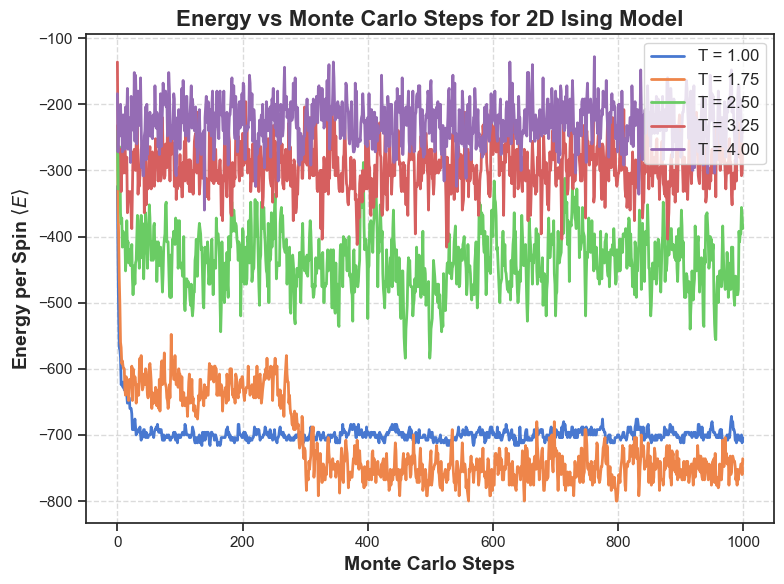

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Set the Seaborn style for publication-quality plots
    sns.set_theme(style="ticks", palette="muted")  # Using a muted color palette

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    
    # Create a plot for Energy vs Monte Carlo steps for all temperatures
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    for T in tqdm(temperatures):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = model.simulate(steps, equilibration=False)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) 
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature on the same plot
        plt.plot(range(steps), energies, label=f'T = {T:.2f}', linewidth=2)  # Increase line width for visibility

    # Finalize the plot for Energy vs Monte Carlo steps
    plt.xlabel(r'Monte Carlo Steps', fontsize=14, fontweight='bold')
    plt.ylabel(r'Energy per Spin $\langle E \rangle$', fontsize=14, fontweight='bold')
    plt.title('Energy vs Monte Carlo Steps for 2D Ising Model', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right', fontsize=12)
    
    # Adjust grid and style for publication quality
    plt.grid(True, linestyle='--', alpha=0.7)  # Use dashed gridlines with moderate transparency
    plt.tight_layout()  # Ensure everything fits inside the figure

    # Set font properties for the figure to match publication standards
    plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16, 'legend.fontsize': 12})
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.31s/it]


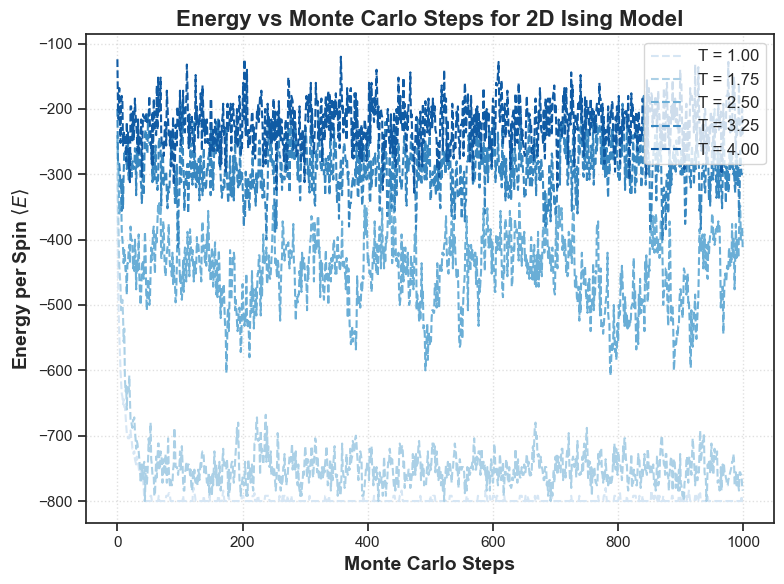

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Set the Seaborn style for publication-quality plots
    sns.set_theme(style="ticks")  # Using a minimalist Seaborn theme with clean lines

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    
    # Create a plot for Energy vs Monte Carlo steps for all temperatures
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Define a custom color palette with faded, soft colors
    custom_palette = sns.color_palette("Blues", n_colors=len(temperatures))  # Subtle blue palette
    
    for i, T in enumerate(tqdm(temperatures)):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = model.simulate(steps, equilibration=False)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) 
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature on the same plot
        plt.plot(range(steps), energies, label=f'T = {T:.2f}', 
                 linewidth=1.5, color=custom_palette[i], linestyle='--')  # Use dotted lines with subtle color

    # Finalize the plot for Energy vs Monte Carlo steps
    plt.xlabel(r'Monte Carlo Steps', fontsize=14, fontweight='bold')
    plt.ylabel(r'Energy per Spin $\langle E \rangle$', fontsize=14, fontweight='bold')
    plt.title('Energy vs Monte Carlo Steps for 2D Ising Model', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right', fontsize=12)

    # Adjust grid and style for publication quality
    plt.grid(True, linestyle=':', alpha=0.6)  # Use dotted gridlines with lower transparency
    plt.tight_layout()  # Ensure everything fits inside the figure

    # Set font properties for the figure to match publication standards
    plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16, 'legend.fontsize': 12})
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


Simulating Energy vs Monte Carlo Steps for 2D Ising Model:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.42s/it]


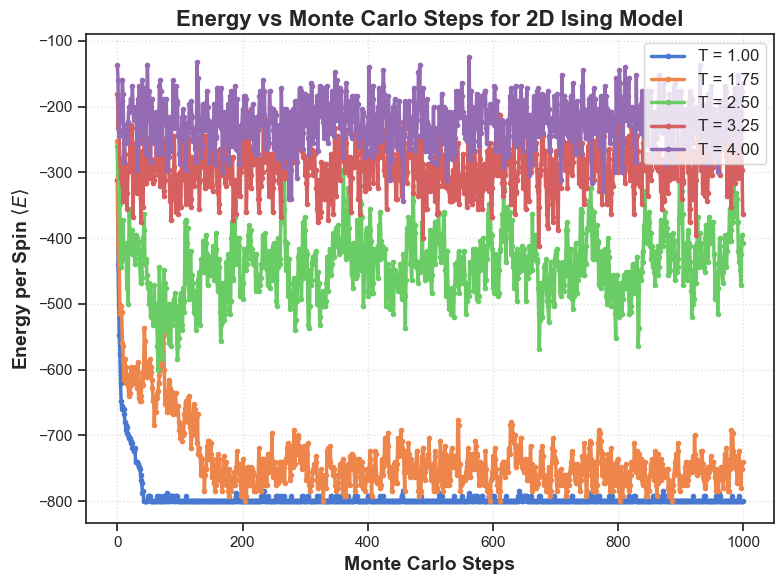

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def main():
    # Simulation parameters
    L = 20          # Lattice size (20x20)
    J = 1           # Interaction energy
    H = 0           # External magnetic field
    steps = 1000    # Number of Monte Carlo steps per temperature
    temperatures = np.linspace(1.0, 4.0, 5)  # Temperature range from 1.0 to 4.0 (5 sample points)
    average_energies = []

    # Set the Seaborn style for publication-quality plots
    sns.set_theme(style="ticks")  # Using a minimalist Seaborn theme with clean lines

    # Initialize progress bar
    print("Simulating Energy vs Monte Carlo Steps for 2D Ising Model:")
    
    # Create a plot for Energy vs Monte Carlo steps for all temperatures
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Define a custom color palette with faded, soft colors
    custom_palette = sns.color_palette("muted", n_colors=len(temperatures))  # Use a "muted" palette for more distinction
    
    for i, T in enumerate(tqdm(temperatures)):
        # Initialize the model
        model = IsingModel2D(L, T, J, H)
        # Perform simulation and get energies over steps
        energies = model.simulate(steps, equilibration=False)
        # Calculate average energy per spin
        avg_energy = np.mean(energies) 
        average_energies.append(avg_energy)

        # Plot energy vs Monte Carlo steps for the current temperature on the same plot
        plt.plot(range(steps), energies, label=f'T = {T:.2f}', 
                 linewidth=2.5, color=custom_palette[i], linestyle='-', marker='o', markersize=3)  # Thicker lines and markers

    # Finalize the plot for Energy vs Monte Carlo steps
    plt.xlabel(r'Monte Carlo Steps', fontsize=14, fontweight='bold')
    plt.ylabel(r'Energy per Spin $\langle E \rangle$', fontsize=14, fontweight='bold')
    plt.title('Energy vs Monte Carlo Steps for 2D Ising Model', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right', fontsize=12)

    # Adjust grid and style for publication quality
    plt.grid(True, linestyle=':', alpha=0.6)  # Use dotted gridlines with lower transparency
    plt.tight_layout()  # Ensure everything fits inside the figure

    # Set font properties for the figure to match publication standards
    plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16, 'legend.fontsize': 12})
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()
